<a href="https://colab.research.google.com/github/jgumin/jupyter-notebook/blob/master/isus/scp%EA%B5%90%EC%9C%A1%EC%83%9D%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scp_analysis


In [0]:
!pip install plotly==4.2.1

In [2]:
!pip install qgrid
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py --sys-prefix qgrid

     |████████████████████████████████| 798kB 5.0MB/s 
  Created wheel for qgrid: filename=qgrid-1.1.1-py2.py3-none-any.whl size=1555709 sha256=35586451274bfc65c8b4c3c8a6b10d32d7482c0e8dbc2a221c5aaf1b5d9a8f03
  Stored in directory: /root/.cache/pip/wheels/97/71/37/8423045f66492c2b48ba9e968257ff7fdc7c941e2656380441
Successfully built qgrid
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "/usr/local/

In [0]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline
# %matplotlib nbagg
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid
plt.rcParams['figure.figsize'] = [10, 6]


# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

# #  display two pandas tables side by side
# from IPython.display import display, HTML
# CSS = """
# .output {
#     flex-direction: row;
# }
# """
# HTML('<style>{}</style>'.format(CSS))


# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# allow multiple outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# allow image input
from IPython.display import Image
from IPython.display import display

In [0]:
Image('https://i.stack.imgur.com/ScJfR.png')

In [0]:
# qg = qgrid.show_grid(df, show_toolbar = True, 
#                 grid_options={'fullWidthRows': True,'syncColumnCellResize': True,
#                               'forceFitColumns': True, 'rowHeight': 40,
#                               'enableColumnReorder': True,'editable': True,
#                               'enableTextSelectionOnCells': True}
#                               )

# Library Importing(plotly 4.2.1)

In [4]:
from plotly import __version__
print (__version__)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# Jupyter setup
# init_notebook_mode(connected=True)

import ipywidgets as widgets

4.1.1


In [0]:
import plotly
from plotly import tools

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Library Importing(plotly 3.6.1)

In [0]:
from plotly import __version__
print (__version__)
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

# Jupyter setup
init_notebook_mode(connected=True)

import ipywidgets as widgets

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

# plotly 테마 설정

theming 참고1: https://medium.com/plotly/introducing-plotly-py-theming-b644109ac9c7<br>
theming 참고2: https://nbviewer.jupyter.org/github/jonmmease/plotly.py_release_notebooks/blob/master/notebooks/v3.4.0/templates-gapminder.ipynb <br>
기본theme설정/해제 참고: https://plot.ly/python/templates/#specifying-a-default-themes 

In [0]:
import plotly.io as pio
pio.templates.default = "plotly" # ['ggplot2', 'seaborn', 'plotly','plotly_white', 'plotly_dark','presentation', 'xgridoff', 'none']

# small-font default

# fig = go.Figure(layout={
#     'title' : 'Figure Title',
#     'font' : {'size': 11,
#               # 'family': 'Courier'
#               }
# })

# templated_fig = pio.to_templated(fig)
# pio.templates['font11'] = templated_fig.layout.template

# pio.templates.default = 'font11'

# large-font default

# fig = go.Figure(layout={
#     'title' : 'Figure Title',
#     'font' : {'size': 15, 'family': 'Courier'}
# })

# templated_fig = pio.to_templated(fig)
# pio.templates['large_courier'] = templated_fig.layout.template

# pio.templates.default = 'large_courier'

In [0]:
scp = pd.read_excel('../content/지원자현황.xlsx', sheet_name='기본정보')
scp_reg = scp.query("등록여부 == '등록'").sort_values(by='국문성명')
pre = pd.read_excel('../content/지원자현황.xlsx', sheet_name='사전설문조사결과')
post = pd.read_excel('../content/지원자현황.xlsx', sheet_name='사후설문조사결과')
lec = pd.read_excel('../content/지원자현황.xlsx', sheet_name='강의평가결과')

In [0]:
pre_als = \
scp[['국문성명', '영문성명', '생년월일', '나이', '총경력',
     '관심분야(대)-편집','소속분류(대)', '재직구분','전문분야(대)',
     '실습대상국', '실습분야', '소속기관', '대표직위', '보직',
     '직급', '실․국', '부서']].merge(pre, left_on='국문성명',right_on='성명'
     ).drop(['ID','시작 시간', '완료 시간', '전자 메일','성명', '기관',
             '기관(응답)', '근속년수','근속년수(응답)', '생년'], axis=1
      ).rename(columns={'관심분야(대)-편집':'관심분야',
                         '소속분류(대)':'소속분류','전문분야(대)':'전문분야'})

# 사전설문분석

## 학습영역 간 상관관계

■ 학습내용 A : 서울시 우수정책 공유사업<br>
■ 학습내용 B : 해외도시정책 및 국제개발협력<br>
■ 학습내용 C : 해외사업수주기획 및 컨설팅의 이해<br>
■ 학습내용 D : 해외도시인프라 환경 및 문화이해

### 학습내용 관련 컬럼 추출

In [0]:
pre_corr = \
pre_als[
pre_als.columns[pre_als.columns.str.contains('학습내용')]
]

pre_corr.columns
# 또는 pre_als.filter(like="학습내용").corr()

Index(['인지적 (Knowledge) 영역 - 학습내용 A', '인지적 (Knowledge) 영역 - 학습내용 B',
       '인지적 (Knowledge) 영역 - 학습내용 C', '인지적 (Knowledge) 영역 - 학습내용 D',
       '기술적 (Skill) 영역 - 학습내용 A', '기술적 (Skill) 영역 - 학습내용 B',
       '기술적 (Skill) 영역 - 학습내용 C', '기술적 (Skill) 영역 - 학습내용 D',
       '태도적 (Attidtude) 영역 - 학습내용 A', '태도적 (Attidtude) 영역 - 학습내용 B',
       '태도적 (Attidtude) 영역 - 학습내용 C', '태도적 (Attidtude) 영역 - 학습내용 D'],
      dtype='object')

### 컬럼명 편집 - 괄호 및 괄호 내 문자 삭제

In [0]:
pre_corr.columns = pre_corr.filter(like="(").columns.str.replace(r'\([^)]*\)', '')

In [0]:
pre_corr.columns

Index(['인지적  영역 - 학습내용 A', '인지적  영역 - 학습내용 B', '인지적  영역 - 학습내용 C',
       '인지적  영역 - 학습내용 D', '기술적  영역 - 학습내용 A', '기술적  영역 - 학습내용 B',
       '기술적  영역 - 학습내용 C', '기술적  영역 - 학습내용 D', '태도적  영역 - 학습내용 A',
       '태도적  영역 - 학습내용 B', '태도적  영역 - 학습내용 C', '태도적  영역 - 학습내용 D'],
      dtype='object')

### 영역별 상관관계 

In [0]:
pre_corr.corr().round(2).to_excel('학습영역 간 상관관계.xlsx')

## 학습영역 간 비교

### 각 영역 내 학습내용별 그룹별 평균

In [0]:
pre_group = pre_als.groupby(pre_als['소속분류'])

pre_score = pre_group[pre_als.filter(like="학습내용").columns].apply(lambda x: x.mean()).round(2).T
pre_score['평균'] = pre_group[pre_als.filter(like="학습내용").columns].apply(lambda x: x.mean()).round(2).T.mean(axis=1).round(2)
pre_score

소속분류,국제기구,민간기업,서울시,서울시 산하기관,중앙부처/산하기관,평균
인지적 (Knowledge) 영역 - 학습내용 A,3.0,2.43,2.25,2.33,1.75,2.35
인지적 (Knowledge) 영역 - 학습내용 B,3.0,2.57,1.62,2.67,3.25,2.62
인지적 (Knowledge) 영역 - 학습내용 C,2.0,2.14,1.50,2.00,2.50,2.03
인지적 (Knowledge) 영역 - 학습내용 D,3.0,2.86,1.62,2.67,3.50,2.73
기술적 (Skill) 영역 - 학습내용 A,3.0,2.43,1.88,2.33,2.00,2.33
기술적 (Skill) 영역 - 학습내용 B,3.0,2.57,1.38,2.67,3.00,2.52
기술적 (Skill) 영역 - 학습내용 C,3.0,2.29,1.50,2.33,2.00,2.22
기술적 (Skill) 영역 - 학습내용 D,3.0,3.00,1.62,2.33,3.25,2.64
태도적 (Attidtude) 영역 - 학습내용 A,3.0,4.43,3.38,3.33,3.00,3.43
태도적 (Attidtude) 영역 - 학습내용 B,4.0,4.29,3.25,2.67,3.25,3.49


In [0]:
pre_score.to_excel('영역간비교분석.xlsx')

### 해외사업수주기획 및 컨설팅의 이해"과 "서울시 우수정책 공유사업" 간 그룹별 평균의 차

In [0]:
print('"해외사업수주기획 및 컨설팅의 이해"과 "서울시 우수정책 공유사업" 간 인지적 영역 편차')

for x in range(5):
  print(str(x+1) + ". " +\
        pre_group['인지적 (Knowledge) 영역 - 학습내용 C'].mean().index[x] + " : " +\
        str((pre_group['인지적 (Knowledge) 영역 - 학습내용 A'].mean()[x]-\
            pre_group['인지적 (Knowledge) 영역 - 학습내용 C'].mean()[x]).round(2)))

"해외사업수주기획 및 컨설팅의 이해"과 "서울시 우수정책 공유사업" 간 인지적 영역 편차
1. 국제기구 : 1.0
2. 민간기업 : 0.29
3. 서울시 : 0.75
4. 서울시 산하기관 : 0.33
5. 중앙부처/산하기관 : -0.75


### 각 영역별 학습내용간 그룹별 표준편차

In [0]:
print("인지적 영역의 학습내용간 그룹별 표준편차: "+str(dict(pre_score[pre_score.index.str.contains("인지적")].std().round(2)[0:5])).replace('{','(').replace('}',')'))
print("기술적 영역의 학습내용간 그룹별 표준편차: "+str(dict(pre_score[pre_score.index.str.contains("기술적")].std().round(2)[0:5])).replace('{','(').replace('}',')'))
print("태도적 영역의 학습내용간 그룹별 표준편차: "+str(dict(pre_score[pre_score.index.str.contains("태도적")].std().round(2)[0:5])).replace('{','(').replace('}',')'))

인지적 영역의 학습내용간 그룹별 표준편차: ('국제기구': 0.5, '민간기업': 0.3, '서울시': 0.34, '서울시 산하기관': 0.32, '중앙부처/산하기관': 0.79)
기술적 영역의 학습내용간 그룹별 표준편차: ('국제기구': 0.0, '민간기업': 0.31, '서울시': 0.21, '서울시 산하기관': 0.17, '중앙부처/산하기관': 0.66)
태도적 영역의 학습내용간 그룹별 표준편차: ('국제기구': 0.5, '민간기업': 0.07, '서울시': 0.08, '서울시 산하기관': 0.47, '중앙부처/산하기관': 0.32)


## 소속간 비교

### 소속별 인지적 영역 수준 평균

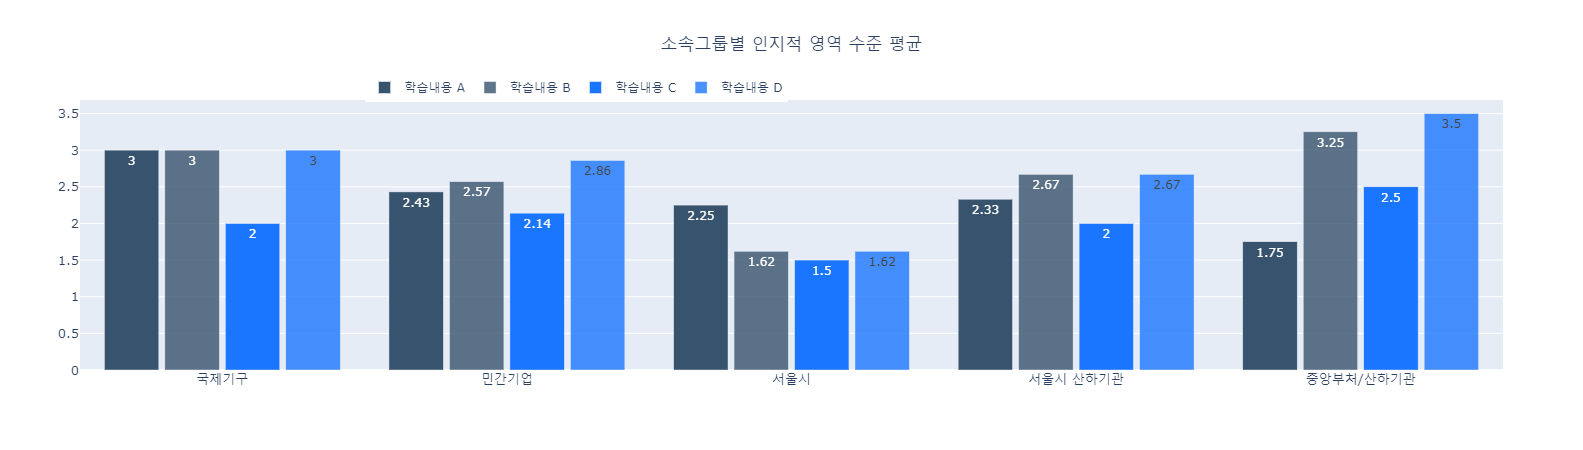

In [0]:
fig = go.Figure(data = [
    go.Bar(
      x=pre_group['인지적 (Knowledge) 영역 - 학습내용 A'].mean().index,
      y=pre_group['인지적 (Knowledge) 영역 - 학습내용 A'].mean().round(2), 
      name='학습내용 A', 
      marker_color='rgb(55, 83, 109)',
      text=pre_group['인지적 (Knowledge) 영역 - 학습내용 A'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['인지적 (Knowledge) 영역 - 학습내용 B'].mean().index,
      y=pre_group['인지적 (Knowledge) 영역 - 학습내용 B'].mean().round(2), 
      name='학습내용 B', 
      marker_color='rgba(55, 83, 109, 0.8)',
      text=pre_group['인지적 (Knowledge) 영역 - 학습내용 B'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['인지적 (Knowledge) 영역 - 학습내용 C'].mean().index,
      y=pre_group['인지적 (Knowledge) 영역 - 학습내용 C'].mean().round(2), 
      name='학습내용 C', 
      marker_color='rgb(26, 118, 255)',
      text=pre_group['인지적 (Knowledge) 영역 - 학습내용 C'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['인지적 (Knowledge) 영역 - 학습내용 D'].mean().index,
      y=pre_group['인지적 (Knowledge) 영역 - 학습내용 D'].mean().round(2), 
      name='학습내용 D', 
      marker_color='rgba(26, 118, 255, 0.8)',
      text=pre_group['인지적 (Knowledge) 영역 - 학습내용 D'].mean().round(2),
      textposition='auto')
    ]
)

fig.update_layout(
    title=dict(text="소속그룹별 인지적 영역 수준 평균", x = 0.5),
    legend=dict(x=0.2, y=1.1, orientation="h"),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    # width=1500,
    # height=800,
)

fig.update_xaxes(tickfont_size=13)
fig.update_yaxes(tickfont_size=13)

fig.show()

### 소속별 기술적 영역 수준 평균

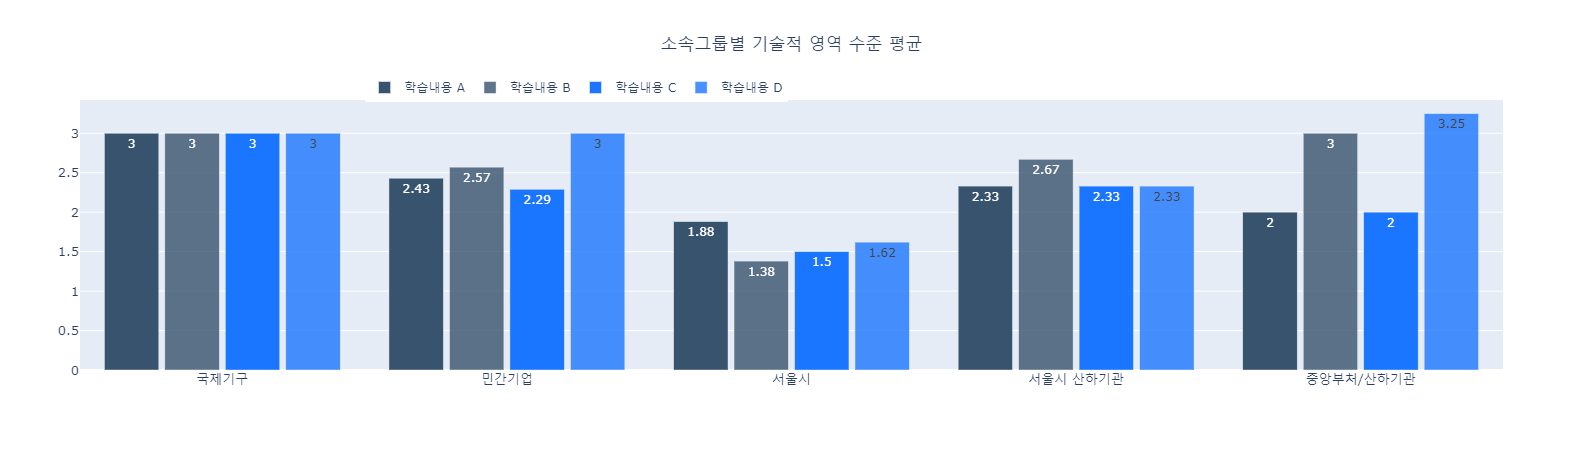

In [0]:
fig = go.Figure(data = [
    go.Bar(
      x=pre_group['기술적 (Skill) 영역 - 학습내용 A'].mean().index,
      y=pre_group['기술적 (Skill) 영역 - 학습내용 A'].mean().round(2), 
      name='학습내용 A', 
      marker_color='rgb(55, 83, 109)',
      text=pre_group['기술적 (Skill) 영역 - 학습내용 A'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['기술적 (Skill) 영역 - 학습내용 B'].mean().index,
      y=pre_group['기술적 (Skill) 영역 - 학습내용 B'].mean().round(2), 
      name='학습내용 B', 
      marker_color='rgba(55, 83, 109, 0.8)',
      text=pre_group['기술적 (Skill) 영역 - 학습내용 B'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['기술적 (Skill) 영역 - 학습내용 C'].mean().index,
      y=pre_group['기술적 (Skill) 영역 - 학습내용 C'].mean().round(2), 
      name='학습내용 C', 
      marker_color='rgb(26, 118, 255)',
      text=pre_group['기술적 (Skill) 영역 - 학습내용 C'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['기술적 (Skill) 영역 - 학습내용 D'].mean().index,
      y=pre_group['기술적 (Skill) 영역 - 학습내용 D'].mean().round(2), 
      name='학습내용 D', 
      marker_color='rgba(26, 118, 255, 0.8)',
      text=pre_group['기술적 (Skill) 영역 - 학습내용 D'].mean().round(2),
      textposition='auto')
    ]
)

fig.update_layout(
    title=dict(text="소속그룹별 기술적 영역 수준 평균", x = 0.5),
    legend=dict(x=0.2, y=1.1, orientation="h"),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    # width=1500,
    # height=800,
)

fig.update_xaxes(tickfont_size=13)
fig.update_yaxes(tickfont_size=13)

fig.show()

### 소속별 태도적 영역 수준 평균

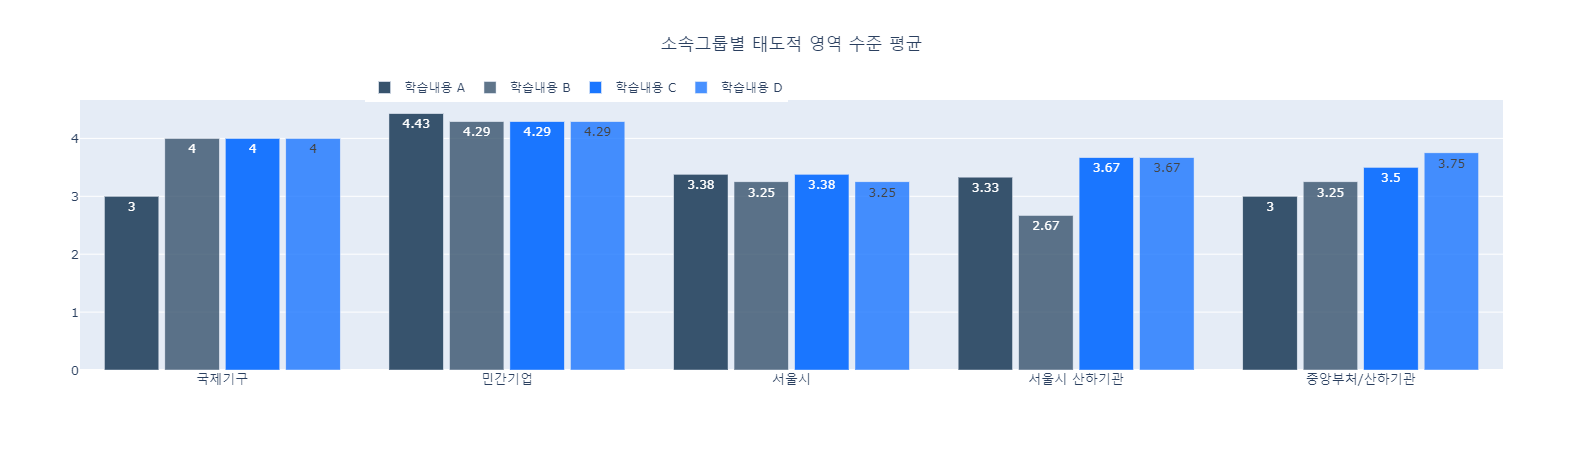

In [0]:
fig = go.Figure(data = [
    go.Bar(
      x=pre_group['태도적 (Attidtude) 영역 - 학습내용 A'].mean().index,
      y=pre_group['태도적 (Attidtude) 영역 - 학습내용 A'].mean().round(2), 
      name='학습내용 A', 
      marker_color='rgb(55, 83, 109)',
      text=pre_group['태도적 (Attidtude) 영역 - 학습내용 A'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['태도적 (Attidtude) 영역 - 학습내용 B'].mean().index,
      y=pre_group['태도적 (Attidtude) 영역 - 학습내용 B'].mean().round(2), 
      name='학습내용 B', 
      marker_color='rgba(55, 83, 109, 0.8)',
      text=pre_group['태도적 (Attidtude) 영역 - 학습내용 B'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['태도적 (Attidtude) 영역 - 학습내용 C'].mean().index,
      y=pre_group['태도적 (Attidtude) 영역 - 학습내용 C'].mean().round(2), 
      name='학습내용 C', 
      marker_color='rgb(26, 118, 255)',
      text=pre_group['태도적 (Attidtude) 영역 - 학습내용 C'].mean().round(2),
      textposition='auto'),
    go.Bar(
      x=pre_group['태도적 (Attidtude) 영역 - 학습내용 D'].mean().index,
      y=pre_group['태도적 (Attidtude) 영역 - 학습내용 D'].mean().round(2), 
      name='학습내용 D', 
      marker_color='rgba(26, 118, 255, 0.8)',
      text=pre_group['태도적 (Attidtude) 영역 - 학습내용 D'].mean().round(2),
      textposition='auto')
    ]
)

fig.update_layout(
    title=dict(text="소속그룹별 태도적 영역 수준 평균", x = 0.5),
    legend=dict(x=0.2, y=1.1, orientation="h"),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    # width=1500,
    # height=800,
)

fig.update_xaxes(tickfont_size=13)
fig.update_yaxes(tickfont_size=13)

fig.show()

## 교육생 관심-전문분야

### y축 관심-전문분야 구분

In [0]:
scp_field = scp_reg.copy()
scp_field['전문분야(대)'] = scp_field['전문분야(대)'].apply(lambda x: x[0:len(x)] +"(전문)")
scp_field['관심분야(대)-편집'] = scp_field['관심분야(대)-편집'].apply(lambda x: x[0:len(x)] +"(관심)")

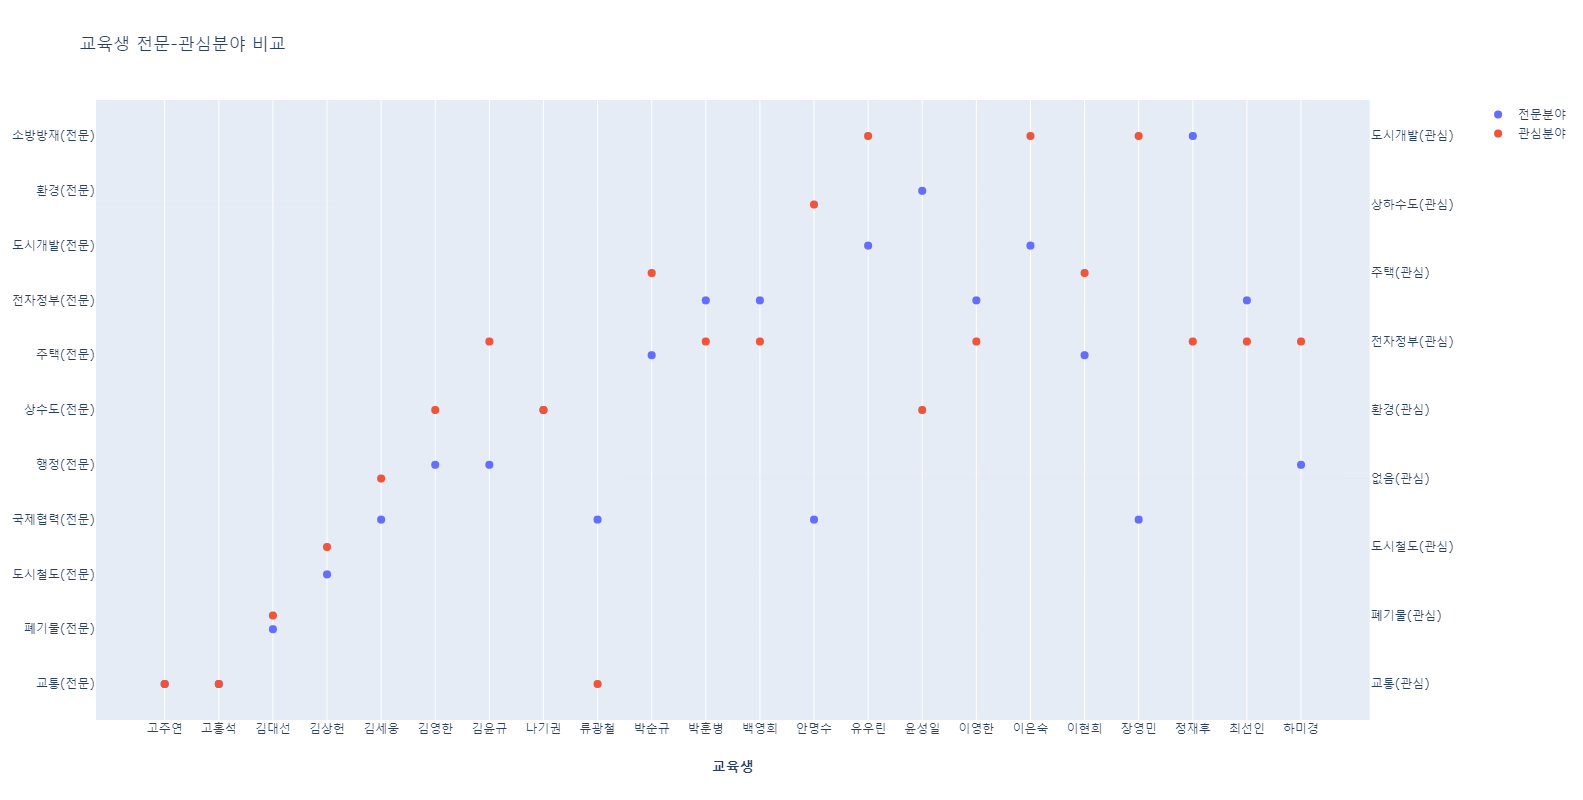

In [0]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Scatter(
    x=scp_field['국문성명'],
    y=scp_field['전문분야(대)'],  
    hoverinfo='skip',
    mode='markers',
    marker_size=8,
    # mode='markers+text',
    # text="전문: "+scp_field['전문분야(대)'],
    # textfont_size = 8,
    # textposition="top right",
    name="전문분야"),
    secondary_y=False
)

fig.add_trace(go.Scatter(
    x=scp_field['국문성명'],
    y=scp_field['관심분야(대)-편집'], 
    hoverinfo='skip',
    mode='markers',
    marker_size=8,
    # mode='markers+text',
    # text="관심: "+scp_field['관심분야(대)-편집'],
    # textfont_size = 8,
    # textposition="top right",
    name="관심분야"),
    secondary_y=True
)

# fig.add_trace(go.Scatter(
#     y=0, 
#     mode="lines"), 
#     secondary_y=False
# )

# Add figure title
fig.update_layout(
    title_text="교육생 전문-관심분야 비교", 
    width=1500,
    height=800,
)

# Set x-axis title
fig.update_xaxes(title_text="<b>교육생</b>")


# Set y-axes titles
fig.update_yaxes(secondary_y=False, gridwidth=0.05, gridcolor='rgba(99,110,250,0.2)')
fig.update_yaxes(secondary_y=True, gridwidth=0.05, gridcolor='rgba(239,85,59,0.2)')
fig.update_yaxes(secondary_y=False, gridwidth=0.05, )
                 # gridcolor='rgba(99,110,250,0.2)'#

fig.show()

### y축 관심-전문분야 구분x

In [0]:
# scp_reg['전문분야(대)'] = scp_reg['전문분야(대)'].apply(lambda x: x[0:len(x)] +"(전문)")
# scp_reg['관심분야(대)-편집'] = scp_reg['관심분야(대)-편집'].apply(lambda x: x[0:len(x)] +"(관심)")

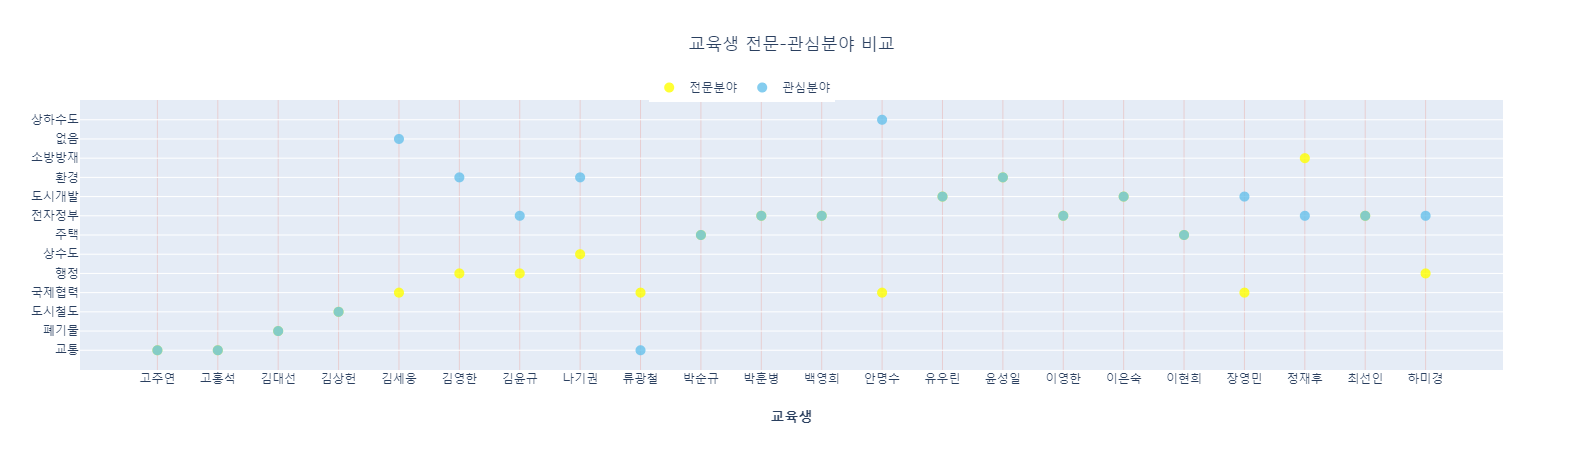

In [0]:
fig = go.Figure(data = [
    go.Scatter(
    x=scp_reg['국문성명'],
    y=scp_reg['전문분야(대)'],  
    hoverinfo='skip',
    mode='markers',
    marker =dict(size=10, color='rgba(255,255,0,0.8)'),
    name="전문분야"),
    go.Scatter(
    x=scp_reg['국문성명'],
    y=scp_reg['관심분야(대)-편집'], 
    hoverinfo='skip',
    mode='markers',
    marker =dict(size=10, color='rgba(102,192,235,0.8)'),
    name="관심분야")]
)

# Add figure title
fig.update_layout(
    title=dict(text="교육생 전문-관심분야 비교", x = 0.5),
    legend=dict(x=0.4, y=1.1, orientation="h")
    # width=1500,
    # height=800,
)

# Set x-axis title
fig.update_xaxes(title_text="<b>교육생</b>", gridwidth=1, gridcolor='rgba(239,85,59,0.2)')


# Set y-axes titles
# fig.update_yaxes(secondary_y=False, gridwidth=0.05, gridcolor='rgba(99,110,250,0.2)')
# fig.update_yaxes(secondary_y=True, gridwidth=0.05, gridcolor='rgba(239,85,59,0.2)')
# fig.update_yaxes(secondary_y=False, gridwidth=0.05, )
                 # gridcolor='rgba(99,110,250,0.2)'#

fig.show()

# 사후설문분석

In [0]:
post.columns

## 만족도 문항 분석

In [0]:
cs_mean = post.pivot_table(
    values=['교육과정의 내용은 교육생 상황에 맞게 구성되었다.',
            '교육과정의 내용과 수준은 이해하기 적절하였다.', 
            '교육과정의 교육방법(강의, 실습/토의, 현장학습 등)은 교육내용을 이해하는데 적합하였다.',
            '교육운영진은 교육과정을 원활하게 운영하였다. (일정관리, 강의준비, 교육생 지원 등)',
            '교육운영진은 응급상황 등 사건사고에 대해 적절히 대처하였다.'],
            index=['기관'],aggfunc='mean',margins=True,
            margins_name="평균").round(2).rename(
            columns={
            '교육과정의 내용은 교육생 상황에 맞게 구성되었다.': '내용은 교육생 상황에 맞게 구성되었다',
            '교육과정의 내용과 수준은 이해하기 적절하였다.':'내용과 수준은 이해하기 적절하였다', 
            '교육과정의 교육방법(강의, 실습/토의, 현장학습 등)은 교육내용을 이해하는데 적합하였다.':
            '교육방법은 내용을 이해하는데 적합하였다',
            '교육운영진은 교육과정을 원활하게 운영하였다. (일정관리, 강의준비, 교육생 지원 등)':
            '운영진은 교육과정을 원활하게 운영하였다',
            '교육운영진은 응급상황 등 사건사고에 대해 적절히 대처하였다.':
            '운영진은 응급상황 등 사건사고에 대해 적절히 대처하였다'
            })

In [11]:
cs_mean_int = cs_mean.mean(axis=1).round(2)
cs_mean["평균"] = cs_mean_int
cs_mean = cs_mean.T.reset_index().rename(columns={"index": "문항"})
cs_mean.index.names = ['']
cs_mean

기관,문항,국제기구,민간기업,서울시,서울시 산하기관,중앙부처/산하기관,평균
,,,,,,,
0,교육방법은 내용을 이해하는데 적합하였다,5.0,4.71,4.43,4.33,4.75,4.59
1,내용과 수준은 이해하기 적절하였다,4.0,4.43,4.43,4.33,4.75,4.45
2,내용은 교육생 상황에 맞게 구성되었다,4.0,4.43,4.29,3.33,4.50,4.23
3,운영진은 교육과정을 원활하게 운영하였다,5.0,4.43,4.14,4.67,4.75,4.45
4,운영진은 응급상황 등 사건사고에 대해 적절히 대처하였다,5.0,4.57,4.14,4.33,4.75,4.45
5,평균,4.6,4.51,4.29,4.20,4.70,4.43


In [50]:
fig = make_subplots(
    rows=4, cols=2, vertical_spacing=0.095,
    specs=[[{},{}],[{},{}],[{},{}],[{"colspan": 2, "type": "table"}, None]],
    subplot_titles=("기관별 만족도",
    "교육방법은 내용을 이해하는데 적합하였다", "내용과 수준은 이해하기 적절하였다",
    "내용은 교육생 상황에 맞게 구성되었다", 
    "운영진은 교육과정을 원활하게 운영하였다", 
    "<br>운영진은 응급상황 등 사건사고에 대해<br>적절히 대처하였다", 
    "문항별, 기관별 만족도 현황"))

fig.add_trace(go.Bar(showlegend=False, width= 0.8,
    x = cs_mean.drop(index=5, columns='평균').mean().round(2).index,
    y = cs_mean.drop(index=5, columns='평균').mean().round(2),
    text = cs_mean.drop(index=5, columns='평균').mean().round(2),
    textposition = 'auto',
    marker=dict(color=cs_mean.drop(index=5, columns='평균').mean().round(2),
                cmax=4.0, cmin=5.0, colorscale='RdBu'),
    ),row=1, col=1)

fig.add_trace(go.Bar(showlegend=False,
    x = post['교육과정의 교육방법(강의, 실습/토의, 현장학습 등)은 교육내용을 이해하는데 적합하였다.'].value_counts().index,
    y = post['교육과정의 교육방법(강의, 실습/토의, 현장학습 등)은 교육내용을 이해하는데 적합하였다.'].value_counts(),
    text = post['교육과정의 교육방법(강의, 실습/토의, 현장학습 등)은 교육내용을 이해하는데 적합하였다.'].value_counts(),    
    textposition = 'auto',
    marker=dict(color=-post['교육과정의 교육방법(강의, 실습/토의, 현장학습 등)은 교육내용을 이해하는데 적합하였다.'
    ].value_counts(), cmax=14.5, cmin=-14.5, colorscale='RdBu')
    ), row=1, col=2)

fig.add_trace(go.Bar(showlegend=False,
    x = post['교육과정의 내용과 수준은 이해하기 적절하였다.'].value_counts().index,
    y = post['교육과정의 내용과 수준은 이해하기 적절하였다.'].value_counts(),
    text = post['교육과정의 내용과 수준은 이해하기 적절하였다.'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['교육과정의 내용과 수준은 이해하기 적절하였다.'
    ].value_counts(),cmax=14.5, cmin=-14.5, colorscale='Viridis')
    ),row=2, col=1)

fig.add_trace(go.Bar(showlegend=False,
    x = post['교육과정의 내용은 교육생 상황에 맞게 구성되었다.'].value_counts().index,
    y = post['교육과정의 내용은 교육생 상황에 맞게 구성되었다.'].value_counts(),
    text = post['교육과정의 내용은 교육생 상황에 맞게 구성되었다.'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['교육과정의 내용은 교육생 상황에 맞게 구성되었다.'
    ].value_counts(),cmax=14.5, cmin=-14.5, colorscale='RdBu')
    ),row=2, col=2)

fig.add_trace(go.Bar(showlegend=False,
    x = post['교육운영진은 교육과정을 원활하게 운영하였다. (일정관리, 강의준비, 교육생 지원 등)'].value_counts().index,
    y = post['교육운영진은 교육과정을 원활하게 운영하였다. (일정관리, 강의준비, 교육생 지원 등)'].value_counts(),
    text = post['교육운영진은 교육과정을 원활하게 운영하였다. (일정관리, 강의준비, 교육생 지원 등)'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['교육운영진은 교육과정을 원활하게 운영하였다. (일정관리, 강의준비, 교육생 지원 등)'
    ].value_counts(),cmax=14.5, cmin=-14.5, colorscale='Viridis')
    ),row=3, col=1)

fig.add_trace(go.Bar(showlegend=False, 
    x = post['교육운영진은 응급상황 등 사건사고에 대해 적절히 대처하였다.'].value_counts().index,
    y = post['교육운영진은 응급상황 등 사건사고에 대해 적절히 대처하였다.'].value_counts(),
    text = post['교육운영진은 응급상황 등 사건사고에 대해 적절히 대처하였다.'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['교육운영진은 응급상황 등 사건사고에 대해 적절히 대처하였다.'
    ].value_counts(), cmax=14.5, cmin=-14.5, colorscale='RdBu')
    ),row=3, col=2)


fig.add_trace(go.Table(
    columnwidth = [220,45,45,45,75,75,45], #columnorder = [1,2],
    header=dict(height=25, 
        values=list(cs_mean.columns), fill_color='#094688',
        font=dict(size=12, color='#ffffff'), align='center'),
    cells=dict(
        values=[cs_mean[k].tolist() for k in cs_mean.columns[:]],
        font=dict(size=12, color='#000000'), align=['left', 'center'])),
    row=4, col=1)

fig.update_xaxes(title=dict(text='<b>만족도</b>', font_size=13),range=[2.5,5.5],row=3)
fig.update_yaxes(title=dict(text='<b>응답자수</b>', font_size=13),range=[0,13.5], col=1)

fig.update_layout(title=dict(text ='만족도 문항 응답 현황',x=0.5, y=0.97),
                  margin = dict(t=90), font_size = 15, width=1000, height=1000,
                  xaxis=dict(#title=dict(text='기관', font_size=13),
                             tickfont_size=8.7, tickwidth=10),
                  yaxis=dict(title=dict(text='<b>평균</b>', font_size=13),range=[0,5.5],
                             tickfont_size=15),
                  xaxis2=dict(range=[2.5,5.5]),
                  yaxis2=dict(title=dict(text='<b>응답자수</b>', font_size=13),range=[0,13.5],
                             tickfont_size=15),
                  )

## 정책자문사례발표 문항 분석

In [0]:
pcs_mean = post.pivot_table(
    values=['정책자문사례발표의 주제는 교육과정 목표와 연계되어 있었다.',
            '정책자문사례발표의 세션시간은 충분하였다.', 
            '정책자문사례발표 자료 작성 및 발표를 위한 안내가 충분히 이루어졌다.',
            '정책자문사례발표의 세션 담당자는 피드백을 충분히 제공하였다.',
            '정책자문사례발표 세션은 연수내용을 이해하는데 도움이 되었다.', 
            '정책자문사례발표는 현장에서 실무능력을 향상시키는데 도움이 되었다.'],
            index=['기관'],aggfunc='mean',margins=True,
            margins_name="평균").round(2).rename(
            columns={
            '정책자문사례발표의 주제는 교육과정 목표와 연계되어 있었다.':'주제는 교육과정 목표와 연계되어 있었다',
            '정책자문사례발표의 세션시간은 충분하였다.':'세션시간은 충분하였다', 
            '정책자문사례발표 자료 작성 및 발표를 위한 안내가 충분히 이루어졌다.':'자료 작성 및 발표를 위한 안내가 충분히 이루어졌다',
            '정책자문사례발표의 세션 담당자는 피드백을 충분히 제공하였다.':'세션 담당자는 피드백을 충분히 제공하였다',
            '정책자문사례발표 세션은 연수내용을 이해하는데 도움이 되었다.':'연수내용을 이해하는데 도움이 되었다', 
            '정책자문사례발표는 현장에서 실무능력을 향상시키는데 도움이 되었다.':'현장에서 실무능력을 향상시키는데 도움이 되었다'
            })

In [53]:
pcs_mean_int = pcs_mean.mean(axis=1).round(2)
pcs_mean["평균"] = pcs_mean_int
pcs_mean = pcs_mean.T.reset_index().rename(columns={"index": "문항"})
pcs_mean.index.names = ['']
pcs_mean

기관,문항,국제기구,민간기업,서울시,서울시 산하기관,중앙부처/산하기관,평균
,,,,,,,
0,연수내용을 이해하는데 도움이 되었다,5.0,4.57,4.29,4.33,4.75,4.50
1,자료 작성 및 발표를 위한 안내가 충분히 이루어졌다,5.0,4.29,4.29,4.33,4.50,4.36
2,현장에서 실무능력을 향상시키는데 도움이 되었다,5.0,4.57,4.14,4.33,4.75,4.45
3,세션 담당자는 피드백을 충분히 제공하였다,5.0,4.43,4.14,4.33,4.75,4.41
4,세션시간은 충분하였다,5.0,4.43,4.29,4.00,4.50,4.36
5,주제는 교육과정 목표와 연계되어 있었다,5.0,4.71,4.29,4.33,4.50,4.50
6,평균,5.0,4.50,4.24,4.27,4.62,4.43


In [59]:
fig = make_subplots(
    rows=4, cols=2, vertical_spacing=0.09,
    specs=[[{},{}],[{},{}],[{},{}],[{"colspan": 2, "type": "table"}, None]],
    subplot_titles=('연수내용을 이해하는데 도움이 되었다', 
                    '자료 작성 및 발표를 위한 안내가 충분히 이루어졌다',
                    '현장에서 실무능력을 향상시키는데 도움이 되었다',
                    '세션 담당자는 피드백을 충분히 제공하였다',
                    '세션시간은 충분하였다',
                    '주제는 교육과정 목표와 연계되어 있었다',
                    "문항별, 기관별 만족도 현황"))

fig.add_trace(go.Bar(showlegend=False,
    x = post['정책자문사례발표 세션은 연수내용을 이해하는데 도움이 되었다.'].value_counts().index,
    y = post['정책자문사례발표 세션은 연수내용을 이해하는데 도움이 되었다.'].value_counts(),
    text = post['정책자문사례발표 세션은 연수내용을 이해하는데 도움이 되었다.'].value_counts(),    
    textposition = 'auto',
    marker=dict(color=-post['정책자문사례발표 세션은 연수내용을 이해하는데 도움이 되었다.'
    ].value_counts(), cmax=14.5, cmin=-14.5, colorscale='RdBu')
    ), row=1, col=1)

fig.add_trace(go.Bar(showlegend=False,
    x = post['정책자문사례발표 자료 작성 및 발표를 위한 안내가 충분히 이루어졌다.'].value_counts().index,
    y = post['정책자문사례발표 자료 작성 및 발표를 위한 안내가 충분히 이루어졌다.'].value_counts(),
    text = post['정책자문사례발표 자료 작성 및 발표를 위한 안내가 충분히 이루어졌다.'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['정책자문사례발표 자료 작성 및 발표를 위한 안내가 충분히 이루어졌다.'
    ].value_counts(),cmax=14.5, cmin=-14.5, colorscale='Viridis')
    ),row=1, col=2)

fig.add_trace(go.Bar(showlegend=False,
    x = post['정책자문사례발표는 현장에서 실무능력을 향상시키는데 도움이 되었다.'].value_counts().index,
    y = post['정책자문사례발표는 현장에서 실무능력을 향상시키는데 도움이 되었다.'].value_counts(),
    text = post['정책자문사례발표는 현장에서 실무능력을 향상시키는데 도움이 되었다.'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['정책자문사례발표는 현장에서 실무능력을 향상시키는데 도움이 되었다.'
    ].value_counts(),cmax=14.5, cmin=-14.5, colorscale='RdBu')
    ),row=2, col=1)

fig.add_trace(go.Bar(showlegend=False,
    x = post['정책자문사례발표의 세션 담당자는 피드백을 충분히 제공하였다.'].value_counts().index,
    y = post['정책자문사례발표의 세션 담당자는 피드백을 충분히 제공하였다.'].value_counts(),
    text = post['정책자문사례발표의 세션 담당자는 피드백을 충분히 제공하였다.'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['정책자문사례발표의 세션 담당자는 피드백을 충분히 제공하였다.'
    ].value_counts(),cmax=14.5, cmin=-14.5, colorscale='Viridis')
    ),row=2, col=2)

fig.add_trace(go.Bar(showlegend=False, 
    x = post['정책자문사례발표의 세션시간은 충분하였다.'].value_counts().index,
    y = post['정책자문사례발표의 세션시간은 충분하였다.'].value_counts(),
    text = post['정책자문사례발표의 세션시간은 충분하였다.'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['정책자문사례발표의 세션시간은 충분하였다.'
    ].value_counts(), cmax=14.5, cmin=-14.5, colorscale='RdBu')
    ),row=3, col=1)

fig.add_trace(go.Bar(showlegend=False,
    x = post['정책자문사례발표의 주제는 교육과정 목표와 연계되어 있었다.'].value_counts().index,
    y = post['정책자문사례발표의 주제는 교육과정 목표와 연계되어 있었다.'].value_counts(),
    text = post['정책자문사례발표의 주제는 교육과정 목표와 연계되어 있었다.'].value_counts(),
    textposition = 'auto',
    marker=dict(color=-post['정책자문사례발표의 주제는 교육과정 목표와 연계되어 있었다.'
    ].value_counts(),cmax=14.5, cmin=-14.5, colorscale='Viridis')
    ), row=3, col=2)

fig.add_trace(go.Table(
    columnwidth = [200,43,43,43,75,75,43], #columnorder = [1,2],
    header=dict(height=25, 
        values=list(pcs_mean.columns), fill_color='#094688',
        font=dict(size=12, color='#ffffff'), align='center'),
    cells=dict(
        values=[pcs_mean[k].tolist() for k in pcs_mean.columns[:]],
        font=dict(size=12, color='#000000'), align=['left', 'center'])),
    row=4, col=1)

fig.update_xaxes(title=dict(text='<b>만족도</b>', font_size=13),range=[2.5,5.5],row=3)
fig.update_yaxes(title=dict(text='<b>응답자수</b>', font_size=13),range=[0,13.5], col=1)

fig.update_layout(title=dict(text ='정책자문사례발표 만족도 응답 현황',x=0.5, y=0.97),
                  margin = dict(t=100), font_size = 15, width=950, height=1100)

## 사전-사후 영역별 수준변화 분석

In [0]:
# 사전,사후 설문조사 결과에서 학습내용 결과 칼럼만 추출
pre_sector = pre[pre.columns[~pre.columns.str.contains('|'.join(['ID','시간','근속년수', '생년', '성별','메일','(응답)','구체적인 안내']))]]
post_sector = post[post.columns[post.columns.str.contains('|'.join(['성명','학습내용 ']))]]
pre_post = pre_sector.merge(post_sector, on="성명", suffixes=('(교육전)', '(교육후)'))

In [155]:
zip(stats.ttest_ind(pre_post.iloc[:,3], pre_post.iloc[:,15]))

In [0]:
pre_post_ttest = []
pre_post_ttest["t-value"]
pre_post_ttest["p-value"]


for k in range(3:14):
  for i in range(15:27):
    for t, p in zip(stats.ttest_ind(pre_post.iloc[:,k], pre_post.iloc[:,i])):
      pre_post_ttest (t, p)
      
      
      .append(t), pre_post_ttest.append(p)

"t검정 통계량: %.3f, pvalue=%.3f"%(result)



pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,3], pre_post_diff.iloc[:,15])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,4], pre_post_diff.iloc[:,16])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,5], pre_post_diff.iloc[:,17])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,6], pre_post_diff.iloc[:,18])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,7], pre_post_diff.iloc[:,19])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,8], pre_post_diff.iloc[:,20])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,8], pre_post_diff.iloc[:,21])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,9], pre_post_diff.iloc[:,22])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,10], pre_post_diff.iloc[:,23])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,11], pre_post_diff.iloc[:,24])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,12], pre_post_diff.iloc[:,25])
pre_post_ttest.append(
    stats.ttest_ind(pre_post_diff.iloc[:,13], pre_post_diff.iloc[:,26])

pre_post_diff = \
pre_post_diff[
    pre_post_diff.columns[
            ~pre_post_diff.columns.str.contains('|'.join(['학습내용']))]
            ]

In [98]:
# 사전-사후 조사결과 T-test 검정
from scipy import stats

result = []
result = stats.ttest_ind(pre_post['인지적 (Knowledge) 영역 - 학습내용 A(교육전)'],pre_post['인지적 (Knowledge) 영역 - 학습내용 A(교육후)'])
result
# print("t검정 통계량: %.3f, pvalue=%.3f"%(result))
pre_post_diff = pre_post.copy()
pre_post_diff.iloc[:,12]

Ttest_indResult(statistic=-5.7507274445701455, pvalue=9.063714764341188e-07)

### 학습내용별 '인지 - 기술 - 태도' 수준 변화

■ 학습내용 A : 서울시 우수정책 공유사업<br>
■ 학습내용 B : 해외도시정책 및 국제개발협력<br>
■ 학습내용 C : 해외사업수주기획 및 컨설팅의 이해<br>
■ 학습내용 D : 해외도시인프라 환경 및 문화이해

In [113]:
pre_post.columns

Index(['성명', '전문분야', '기관', '인지적 (Knowledge) 영역 - 학습내용 A(교육전)',
       '인지적 (Knowledge) 영역 - 학습내용 B(교육전)', '인지적 (Knowledge) 영역 - 학습내용 C(교육전)',
       '인지적 (Knowledge) 영역 - 학습내용 D(교육전)', '기술적 (Skill) 영역 - 학습내용 A(교육전)',
       '기술적 (Skill) 영역 - 학습내용 B(교육전)', '기술적 (Skill) 영역 - 학습내용 C(교육전)',
       '기술적 (Skill) 영역 - 학습내용 D(교육전)', '태도적 (Attidtude) 영역 - 학습내용 A(교육전)',
       '태도적 (Attidtude) 영역 - 학습내용 B(교육전)', '태도적 (Attidtude) 영역 - 학습내용 C(교육전)',
       '태도적 (Attidtude) 영역 - 학습내용 D(교육전)', '인지적 (Knowledge) 영역 - 학습내용 A(교육후)',
       '인지적 (Knowledge) 영역 - 학습내용 B(교육후)', '인지적 (Knowledge) 영역 - 학습내용 C(교육후)',
       '인지적 (Knowledge) 영역 - 학습내용 D(교육후)', '기술적 (Skill) 영역 - 학습내용 A(교육후)',
       '기술적 (Skill) 영역 - 학습내용 B(교육후)', '기술적 (Skill) 영역 - 학습내용 C(교육후)',
       '기술적 (Skill) 영역 - 학습내용 D(교육후)', '태도적 (Attidtude) 영역 - 학습내용 A(교육후)',
       '태도적 (Attidtude) 영역 - 학습내용 B(교육후)', '태도적 (Attidtude) 영역 - 학습내용 C(교육후)',
       '태도적 (Attidtude) 영역 - 학습내용 D(교육후)'],
      dtype='object')

In [0]:
# 수준 변화 측정 위한 기본 Dataframe 생성
pre_post_diff = pre_post.copy()

pre_post_diff["「서울시 우수정책 공유사업」 인지수준 증가치"] =\
    pre_post_diff.iloc[:,15] - pre_post_diff.iloc[:,3]
pre_post_diff["「해외도시정책 및 국제개발협력」 인지수준 증가치"] =\
    pre_post_diff.iloc[:,16] - pre_post_diff.iloc[:,4]
pre_post_diff["「해외사업수주기획 및 컨설팅의 이해」 인지수준 증가치"] =\
    pre_post_diff.iloc[:,17] - pre_post_diff.iloc[:,5]
pre_post_diff["「해외도시인프라 환경 및 문화이해」 인지수준 증가치"] =\
    pre_post_diff.iloc[:,18] - pre_post_diff.iloc[:,6]
pre_post_diff["「서울시 우수정책 공유사업」 기술수준 증가치"] =\
    pre_post_diff.iloc[:,19] - pre_post_diff.iloc[:,7]
pre_post_diff["「해외도시정책 및 국제개발협력」 기술수준 증가치"] =\
    pre_post_diff.iloc[:,20] - pre_post_diff.iloc[:,8]
pre_post_diff["「해외사업수주기획 및 컨설팅의 이해」 기술수준 증가치"] =\
    pre_post_diff.iloc[:,21] - pre_post_diff.iloc[:,9]
pre_post_diff["「해외도시인프라 환경 및 문화이해」 기술수준 증가치"] =\
    pre_post_diff.iloc[:,22] - pre_post_diff.iloc[:,10]
pre_post_diff["「서울시 우수정책 공유사업」 태도수준 증가치"] =\
    pre_post_diff.iloc[:,23] - pre_post_diff.iloc[:,11]
pre_post_diff["「해외도시정책 및 국제개발협력」 태도수준 증가치"] =\
    pre_post_diff.iloc[:,24] - pre_post_diff.iloc[:,12]
pre_post_diff["「해외사업수주기획 및 컨설팅의 이해」 태도수준 증가치"] =\
    pre_post_diff.iloc[:,25] - pre_post_diff.iloc[:,13]
pre_post_diff["「해외도시인프라 환경 및 문화이해」 태도수준 증가치"] =\
    pre_post_diff.iloc[:,26] - pre_post_diff.iloc[:,14]

pre_post_diff = \
pre_post_diff[
    pre_post_diff.columns[
            ~pre_post_diff.columns.str.contains('|'.join(['학습내용']))]
            ]

### 문항별 수준 증가치 측정<br>
증가치: [교육후 수준 - 교육전 수준]

In [0]:
# Data Cleaning : 증가치 칼럼만 남김 <"성명", "전문분야", "기관" 칼럼 삭제>
pre_post_q = pre_post_diff.drop(columns=["성명", "전문분야", "기관"])

# 평균값 추가
pre_post_q.loc[22] = pre_post_q.mean()

# 행렬 변경 및 생성 된 평균값 칼럼명 변경
pre_post_q = \
pre_post_q.T.drop(
    pre_post_q.T.columns[:22].to_list(),axis=1
    ).rename(columns={22:"항목별 평균 증가치"})

# % 증가치 칼럼 추가
pre_post_q['증가치(%)'] = (pre_post_q['항목별 평균 증가치'] / 5 *100).astype(float)

In [0]:
pre_post_q.round(2)

### 기관별 수준 증가치 측정

In [127]:
# 기관으로 그룹화하여 평균 계산
pre_post_organ = \
pre_post_diff.pivot_table(
    values=pre_post_diff.columns[3:],index=['기관'],
    aggfunc='mean',margins=True, margins_name="평균").round(2).reset_index()

# 기관별 평균 칼럼 추가 및 필드값 변경
pre_post_organ['기관별 평균 증가치'] = pre_post_organ.mean(axis=1)
pre_post_organ.set_value(5, '기관', '항목별 평균 증가치')
pre_post_organ = pre_post_organ.set_index("기관").T

# % 증가치 칼럼 추가
pre_post_organ['항목별 평균 증가치(%)'] = (pre_post_organ['항목별 평균 증가치'] / 5 *100).astype(float)

# % 기관별 평균 증가치 칼럼 추가
pre_post_organ = pre_post_organ.T
pre_post_organ['기관별 평균 증가치(%)'] = (pre_post_organ['기관별 평균 증가치'] / 5 *100).astype(float)
pre_post_organ = pre_post_organ.T
pre_post_organ.set_value("기관별 평균 증가치(%)", '항목별 평균 증가치(%)', pre_post_organ['항목별 평균 증가치(%)'][:13].mean())

pre_post_organ = pre_post_organ.reset_index().rename(columns={'index': '문항/기관','중앙부처/산하기관': '중앙부처/ 산하기관'})
pre_post_organ.round(2)

기관,문항/기관,국제기구,민간기업,서울시,서울시 산하기관,중앙부처/ 산하기관,항목별 평균 증가치,항목별 평균 증가치(%)
0,「서울시 우수정책 공유사업」 기술수준 증가치,1.00,1.57,2.00,1.33,2.25,1.77,35.40
1,「서울시 우수정책 공유사업」 인지수준 증가치,1.00,1.57,1.86,1.33,2.75,1.82,36.40
2,「서울시 우수정책 공유사업」 태도수준 증가치,2.00,0.00,0.86,0.67,1.25,0.68,13.60
3,「해외도시인프라 환경 및 문화이해」 기술수준 증가치,2.00,0.71,1.43,1.33,1.00,1.14,22.80
4,「해외도시인프라 환경 및 문화이해」 인지수준 증가치,2.00,0.86,1.29,1.00,0.50,1.00,20.00
5,「해외도시인프라 환경 및 문화이해」 태도수준 증가치,1.00,-0.14,0.71,0.33,0.50,0.36,7.20
6,「해외도시정책 및 국제개발협력」 기술수준 증가치,1.00,1.14,2.14,1.33,1.25,1.50,30.00
7,「해외도시정책 및 국제개발협력」 인지수준 증가치,1.00,1.14,1.71,1.67,1.00,1.36,27.20
8,「해외도시정책 및 국제개발협력」 태도수준 증가치,1.00,-0.14,0.43,1.67,1.00,0.55,11.00
9,「해외사업수주기획 및 컨설팅의 이해」 기술수준 증가치,1.00,1.14,1.57,1.67,2.25,1.55,31.00


In [0]:
pre_post_organ.round(2).to_excel("항목별 평균 증가치.xlsx")

In [0]:
# for in 문 활용한 기관별 수준 증가치 측정
# q = []
# a = []
# for k, i in zip(pre_post.columns[18:30], pre_post.columns[6:18]):
#   a.append(np.round_((pre_post[k] - pre_post[i]).mean(),2))
#   if "인지적 (Knowledge) 영역 - 학습내용 A(교육후)" in k:
#     q.append(k.replace("인지적 (Knowledge) 영역 - 학습내용 A(교육후)","「서울시 우수정책 공유사업」 인지수준 증가치"))
#   elif "인지적 (Knowledge) 영역 - 학습내용 B(교육후)" in k:
#     q.append(k.replace("인지적 (Knowledge) 영역 - 학습내용 B(교육후)","「해외도시정책 및 국제개발협력」 인지수준 증가치"))
#   elif "인지적 (Knowledge) 영역 - 학습내용 C(교육후)" in k:
#     q.append(k.replace("인지적 (Knowledge) 영역 - 학습내용 C(교육후)","「해외사업수주기획 및 컨설팅의 이해」 인지수준 증가치"))
#   elif "인지적 (Knowledge) 영역 - 학습내용 D(교육후)" in k:
#     q.append(k.replace("인지적 (Knowledge) 영역 - 학습내용 D(교육후)","「해외도시인프라 환경 및 문화이해」 인지수준 증가치"))
#   elif "기술적 (Skill) 영역 - 학습내용 A(교육후)" in k:
#     q.append(k.replace("기술적 (Skill) 영역 - 학습내용 A(교육후)","「서울시 우수정책 공유사업」 기술수준 증가치"))
#   elif "기술적 (Skill) 영역 - 학습내용 B(교육후)" in k:
#     q.append(k.replace("기술적 (Skill) 영역 - 학습내용 B(교육후)","「해외도시정책 및 국제개발협력」 기술수준 증가치"))
#   elif "기술적 (Skill) 영역 - 학습내용 C(교육후)" in k:
#     q.append(k.replace("기술적 (Skill) 영역 - 학습내용 C(교육후)","「해외사업수주기획 및 컨설팅의 이해」 기술수준 증가치"))
#   elif "기술적 (Skill) 영역 - 학습내용 D(교육후)" in k:
#     q.append(k.replace("기술적 (Skill) 영역 - 학습내용 D(교육후)","「해외도시인프라 환경 및 문화이해」 기술수준 증가치"))
#   elif "태도적 (Attidtude) 영역 - 학습내용 A(교육후)" in k:
#     q.append(k.replace("태도적 (Attidtude) 영역 - 학습내용 A(교육후)","「서울시 우수정책 공유사업」 태도수준 증가치"))
#   elif "태도적 (Attidtude) 영역 - 학습내용 B(교육후)" in k:
#     q.append(k.replace("태도적 (Attidtude) 영역 - 학습내용 B(교육후)","「해외도시정책 및 국제개발협력」 태도수준 증가치"))
#   elif "태도적 (Attidtude) 영역 - 학습내용 C(교육후)" in k:
#     q.append(k.replace("태도적 (Attidtude) 영역 - 학습내용 C(교육후)","「해외사업수주기획 및 컨설팅의 이해」 태도수준 증가치"))
#   else:
#     q.append(k.replace("태도적 (Attidtude) 영역 - 학습내용 D(교육후)","「해외도시인프라 환경 및 문화이해」 태도수준 증가치"))

# differ = pd.DataFrame([q,a],index=["항목","증가치(5점기준)"]).T
# differ['증가치(%)'] = (differ['증가치(5점기준)'] / 5 *100).astype(float).round(2)
# differ.head()

In [129]:
fig = go.Figure(data=go.Table(
    columnwidth = [180,50,50,50,50,50,50,50], #columnorder = [0,6],
    header=dict(height=20, 
        values=list(pre_post_organ.round(2).columns), fill_color='#094688',
        font=dict(size=[13], color='#ffffff'), align='center'),
    cells=dict(height=25,
        values=[pre_post_organ.round(2)[k].tolist() for k in pre_post_organ.round(2).columns[:]],
        font=dict(size=[13], color='#000000'), align=['left', 'center'])))

fig.update_layout(title=dict(text ='문항별,기관별 인지-기술-태도 수준 증가치',x=0.5, y=0.97),
                  margin = dict(t=50), font_size = 13, width=1200)

## 문항별,기관별 인지-기술-태도 수준 증가치 (종합)

In [0]:
pre_post_organ.round(2)["문항/기관"][:12]
pre_post_organ.round(2)["항목별 평균 증가치"][:12]

In [132]:
pre_post_organ_sorted = pre_post_organ.round(2)[["문항/기관","항목별 평균 증가치"]][:12].sort_values("항목별 평균 증가치")

fig = go.Figure(data=go.Bar(showlegend=False, orientation = 'h',
    x = pre_post_organ_sorted.round(2)["항목별 평균 증가치"][:12],
    y = pre_post_organ_sorted.round(2)["문항/기관"][:12],
    text = pre_post_organ_sorted.round(2)["항목별 평균 증가치"][:12],    
    textposition = 'auto',
    marker=dict(color=-pre_post_organ_sorted.round(2)["항목별 평균 증가치"][:12],
                cmax=3.5, cmin=-3.5, colorscale='Viridis')))

fig.update_xaxes(title=dict(text='증가분(5점기준)', font_size=13),range=[0, 2])

fig.update_layout(title=dict(text ='문항별 인지-기술-태도 수준 증가현황',x=0.5, y=0.97),
                  margin = dict(t=50), font_size = 13)

In [135]:
pre_post_organ_tsorted = pre_post_organ.set_index("문항/기관").T.iloc[:5,12:13].round(2).sort_values("기관별 평균 증가치")

fig = go.Figure(data=go.Bar(showlegend=False, orientation = 'h',
    x = pre_post_organ_tsorted["기관별 평균 증가치"],
    y = pre_post_organ_tsorted.index, width=0.7,
    text = pre_post_organ_tsorted["기관별 평균 증가치"],    
    textposition = 'auto',
    marker=dict(color=-pre_post_organ_tsorted["기관별 평균 증가치"],
                cmax=3.5, cmin=-3.5, colorscale='Viridis')))

fig.update_xaxes(title=dict(text='증가분(5점기준)', font_size=13),range=[0, 1.5])

fig.update_layout(title=dict(text ='기관별 인지-기술-태도 수준 증가현황',x=0.5, y=0.97),
                  margin = dict(t=50), font_size = 13, bargap=0.1)

## 문항별,기관별 인지-기술-태도 수준 증가치 상관관계

In [87]:
pre_post_organ

기관,문항/기관,국제기구,민간기업,서울시,서울시 산하기관,중앙부처/ 산하기관,항목별 평균 증가치,항목별 평균 증가치(%)
0,「서울시 우수정책 공유사업」 기술수준 증가치,1.000000,1.57,2.000,1.3300,2.2500,1.770,35.4
1,「서울시 우수정책 공유사업」 인지수준 증가치,1.000000,1.57,1.860,1.3300,2.7500,1.820,36.4
2,「서울시 우수정책 공유사업」 태도수준 증가치,2.000000,1.43,2.860,1.6700,1.0000,1.860,37.2
3,「해외도시인프라 환경 및 문화이해」 기술수준 증가치,2.000000,1.43,1.570,1.3300,2.2500,1.640,32.8
4,「해외도시인프라 환경 및 문화이해」 인지수준 증가치,2.000000,0.86,1.290,1.0000,0.5000,1.000,20.0
5,「해외도시인프라 환경 및 문화이해」 태도수준 증가치,1.000000,-0.14,0.570,0.3300,0.7500,0.360,7.2
6,「해외도시정책 및 국제개발협력」 기술수준 증가치,1.000000,1.14,2.140,1.3300,1.2500,1.500,30.0
7,「해외도시정책 및 국제개발협력」 인지수준 증가치,1.000000,1.14,1.710,1.6700,1.0000,1.360,27.2
8,「해외도시정책 및 국제개발협력」 태도수준 증가치,2.000000,-0.29,0.140,1.0000,1.2500,0.410,8.2
9,「해외사업수주기획 및 컨설팅의 이해」 기술수준 증가치,1.000000,0.86,1.710,1.3300,1.2500,1.270,25.4


In [78]:
pre_post_organ["문항/기관"].

기관,국제기구,민간기업,서울시,서울시 산하기관,중앙부처/ 산하기관
기관,,,,,
국제기구,1.000000,0.109632,-0.025249,0.139272,-0.047287
민간기업,0.109632,1.000000,0.848066,0.582744,0.605731
서울시,-0.025249,0.848066,1.000000,0.551034,0.279245
서울시 산하기관,0.139272,0.582744,0.551034,1.000000,0.300313
중앙부처/ 산하기관,-0.047287,0.605731,0.279245,0.300313,1.000000
